<a href="https://colab.research.google.com/github/brrikcy/machine-learning/blob/main/ML_EXP_07_Support_Vector_Machine_Ad_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm

>mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Dataset**

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/DATASETS/Social_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# **Linear SVM (2D Dataset)**

>Tuning Dataset

In [ ]:
#dropping columns to make it suitable for 2D data
data1=data.drop(columns=['User ID','Gender'])
#dropping rows to reduce complexity
data1=data1[150:390]

data1

,Age,EstimatedSalary,Purchased
150,26,15000,0
151,41,45000,0
152,31,76000,0
153,36,50000,0
154,40,47000,0
...,...,...,...
385,56,60000,1
386,49,39000,1
387,39,71000,0
388,47,34000,1


**Data Preprocessing**

In [ ]:
#removing duplicates
data1.drop_duplicates(inplace=True)


In [ ]:
#removing rows with missing values
data1.dropna(inplace=True)

**Splitting Dataset**

In [ ]:
# setting a target variable
x=data1.drop(columns=['Purchased'])
y=data1['Purchased']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Training a Linear SVM Model**

In [ ]:
#fitting data to SVM
model=svm.SVC(kernel='linear',C=1.0)

model.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
#printing the accuracy using score function
print(f"Accuracy : {(model.score(x_test,y_test))*100} %")

Accuracy : 89.13043478260869 %


In [ ]:
#displaying classification report
from sklearn.metrics import classification_report

y_pred=model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        21
           1       0.95      0.84      0.89        25

    accuracy                           0.89        46
   macro avg       0.89      0.90      0.89        46
weighted avg       0.90      0.89      0.89        46



**Visualization**

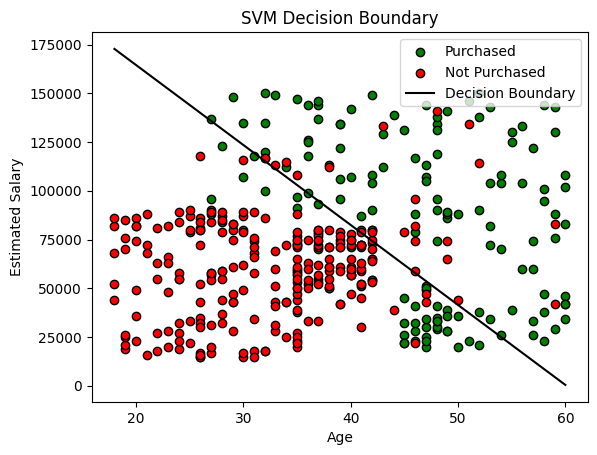

In [ ]:
#splitting binary result for plotting
purchased_data = data[data["Purchased"] == 1]
not_purchased_data = data[data["Purchased"] == 0]
#plotting datapoints
plt.scatter(purchased_data["Age"], purchased_data["EstimatedSalary"], color='green', edgecolors='k', label='Purchased')
plt.scatter(not_purchased_data["Age"], not_purchased_data["EstimatedSalary"], color='red', edgecolors='k', label='Not Purchased')

#extracting values of decision boundary
w = model.coef_[0]
a = -w[0] / w[1]  # slope of the decision boundary
xx = np.linspace(data1["Age"].min(), data1["Age"].max())
yy = a * xx - (model.intercept_[0]) / w[1]  # equation of the decision boundary

# Plotting decision boundary
plt.plot(xx, yy, 'k-', label='Decision Boundary')

#plotting labels
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.title('SVM Decision Boundary')
plt.show()

# **Hyperparameter Tuning**

Tuning Dataset

In [ ]:
#dropping user id column
data2=data.drop(columns=['User ID'])
#extracting rows
data2=data2[100:250]

**Data Preprocessing**

>Handling missing and duplicate values

In [ ]:
#dropping duplicates
data2.drop_duplicates(inplace=True)
#dropping rows with missing values
data2.dropna(inplace=True)

>Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
#creating an income of label encoder
encoder=LabelEncoder()
#encoding
data2['Gender']=encoder.fit_transform(data2['Gender'])

**Splitting Feature and Target Data**

In [ ]:
#independent features
x=data2.drop(columns=['Purchased'])
#dependent feature
y=data2['Purchased']

**Train Test Split**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler
#creating an instance of standard scaler
scaler = StandardScaler()
#scaling x train and x test
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


**Training and Testing a Model (default SVM)**

In [ ]:
from sklearn.svm import SVC
#creating an instance for default svm kernel='rbf',C=1.0,gamma=auto
svc=SVC()
#fitting data
svc.fit(x_train,y_train)
#testing model
y_pred=svc.predict(x_test)
#displaying accuracy using score function
print(f"Accuracy : {(svc.score(x_test,y_test))*100} %")

Accuracy : 96.66666666666667 %


**Confusion Matrix**

Confusion matrix

 [[25  0]
 [ 1  4]]

True Positives(TP) =  25

True Negatives(TN) =  4

False Positives(FP) =  0

False Negatives(FN) =  1


<Axes: >

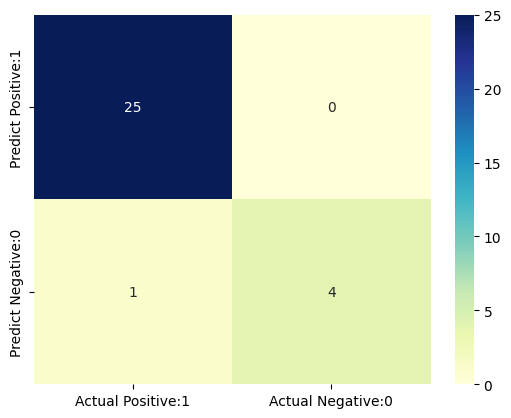

In [ ]:
from sklearn.metrics import confusion_matrix
#calculating confusion matrix
cm = confusion_matrix(y_test, y_pred)
#displaying values of confusion matrix
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
index=['Predict Positive:1', 'Predict Negative:0'])
#plotting confusion matrix
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
#displaying classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.80      0.89         5

    accuracy                           0.97        30
   macro avg       0.98      0.90      0.93        30
weighted avg       0.97      0.97      0.97        30



**Hyper Parameter Tuning Using Grid Search**


In [ ]:
from sklearn.model_selection import GridSearchCV

# parameters for cross validation
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
{'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
{'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':
[0.01,0.02,0.03,0.04,0.05]}]

#performing gridsearch
grid_search = GridSearchCV(estimator = svc,param_grid = parameters,scoring = 'accuracy',cv = 5,verbose=2)
grid_search.fit(x_train_scaled, y_train)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ...............................C=100, kernel=linear; total time=   0.0s
[CV] END ...............................C=100,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy', verbose=2)

In [ ]:
#displaying best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 100, 'degree': 3, 'gamma': 0.04, 'kernel': 'poly'}
